In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM,BatchNormalization, TimeDistributed, Conv1D,MaxPooling1D,GRU
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [4]:
#gait = pd.read_csv("gaitFull.csv")
gait = pd.read_csv("gaitFullModified2.csv")

In [27]:
X = gait.drop('label',  axis=1)
y = gait['label']-1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [29]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [30]:
X_train= X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test= X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [31]:
y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [32]:
y_train= y_train.reshape((y_train.shape[0],y_train.shape[1]))
#y_test= y_test.reshape((1,476,4))

In [33]:
X_train.shape

(1900, 11, 1)

In [35]:
es = EarlyStopping(monitor='val_loss', verbose=1)

In [55]:
model = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model.add(LSTM(200,activation='relu',input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 804       
Total params: 162,404
Trainable params: 162,404
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[0]

model.add(Conv1D(100, kernel_size=5, input_shape=(n_timesteps, n_features)))
model.add(LSTM(100,
         return_sequences=False,activation='relu'))

model.add(Dropout(0.5))
#model.add(Flatten())


#model.add(LSTM(units=50,
 #        return_sequences=False))
#model.add(Dropout(0.2))

#model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(units=n_outputs, activation='sigmoid'))
model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 7, 100)            600       
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1900)              191900    
Total params: 272,900
Trainable params: 272,900
Non-trainable params: 0
_________________________________________________________________


In [22]:
odel = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model.add(LSTM(200,activation='relu',input_shape=(n_timesteps, n_features)))

model.add(Dropout(0.5))
#model.add(Flatten())


#model.add(LSTM(units=50,
 #        return_sequences=False))
#model.add(Dropout(0.2))

#model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(units=n_outputs, activation='sigmoid'))
model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

ValueError: Input 0 is incompatible with layer lstm_9: expected ndim=3, found ndim=2

In [56]:
history=model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2,shuffle=True)

Train on 1520 samples, validate on 380 samples
Epoch 1/50
1520/1520 [==============================] - 1s 499us/step - loss: 2.7244 - accuracy: 0.3664 - val_loss: 2.0009 - val_accuracy: 0.3632
Epoch 2/50
1520/1520 [==============================] - 0s 165us/step - loss: 2.0891 - accuracy: 0.3553 - val_loss: 1.4615 - val_accuracy: 0.3632
Epoch 3/50
1520/1520 [==============================] - 0s 171us/step - loss: 1.6030 - accuracy: 0.3533 - val_loss: 1.3353 - val_accuracy: 0.3553
Epoch 4/50
1520/1520 [==============================] - 0s 160us/step - loss: 1.3786 - accuracy: 0.2743 - val_loss: 1.3793 - val_accuracy: 0.2053
Epoch 5/50
1520/1520 [==============================] - 0s 162us/step - loss: 1.4100 - accuracy: 0.2559 - val_loss: 1.3798 - val_accuracy: 0.2711
Epoch 6/50
1520/1520 [==============================] - 0s 161us/step - loss: 1.3711 - accuracy: 0.2895 - val_loss: 1.3748 - val_accuracy: 0.3789
Epoch 7/50
1520/1520 [==============================] - 0s 176us/step - loss:

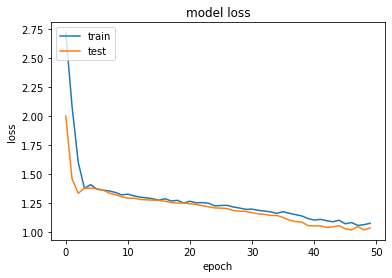

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


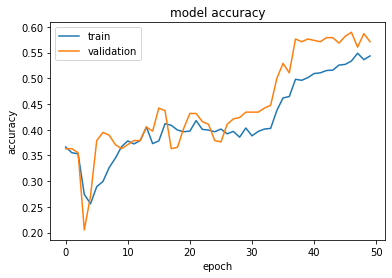

In [57]:
from pylab import rcParams
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
x=model.predict(X_test)

In [59]:
import tensorflow as tf
index = tf.argmax(x,axis=1)

In [60]:
z=np.array(index)

In [61]:
print(confusion_matrix(y_test, z))

[[  9  28   0  16]
 [  3 129   0  43]
 [  0  11   0  59]
 [  5  38   0 135]]


In [62]:
d=confusion_matrix(y_test, z)

In [63]:
print(classification_report(y_test, z)) 

              precision    recall  f1-score   support

           0       0.53      0.17      0.26        53
           1       0.63      0.74      0.68       175
           2       0.00      0.00      0.00        70
           3       0.53      0.76      0.63       178

    accuracy                           0.57       476
   macro avg       0.42      0.42      0.39       476
weighted avg       0.49      0.57      0.51       476



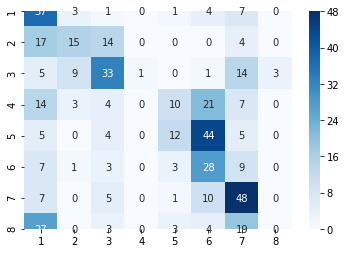

In [23]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "12345678"],
              columns = [i for i in "12345678"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [24]:
gait = pd.read_csv("gaitFullModified2.csv")

In [25]:
X = gait.drop('label',  axis=1)
y = gait['label']-1

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "1234"],
              columns = [i for i in "1234"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

ValueError: Shape of passed values is (8, 8), indices imply (4, 4)